In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [8]:
data = pd.read_csv('/survey.csv')

In [9]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [10]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [11]:
data.shape

(1259, 27)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<Axes: >

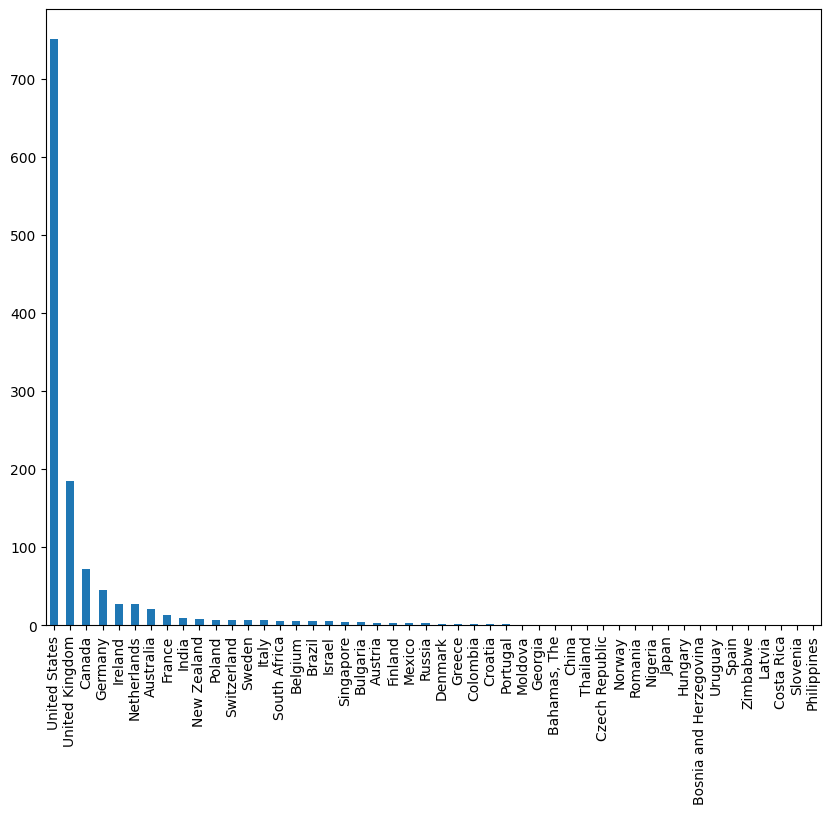

In [13]:
data['Country'].value_counts().plot(kind='bar', figsize=(10,8))

In [14]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [15]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [16]:
data['self_employed'].fillna('No', inplace=True)

In [17]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [18]:
data['work_interfere'].fillna('N/A', inplace=True)

<Axes: >

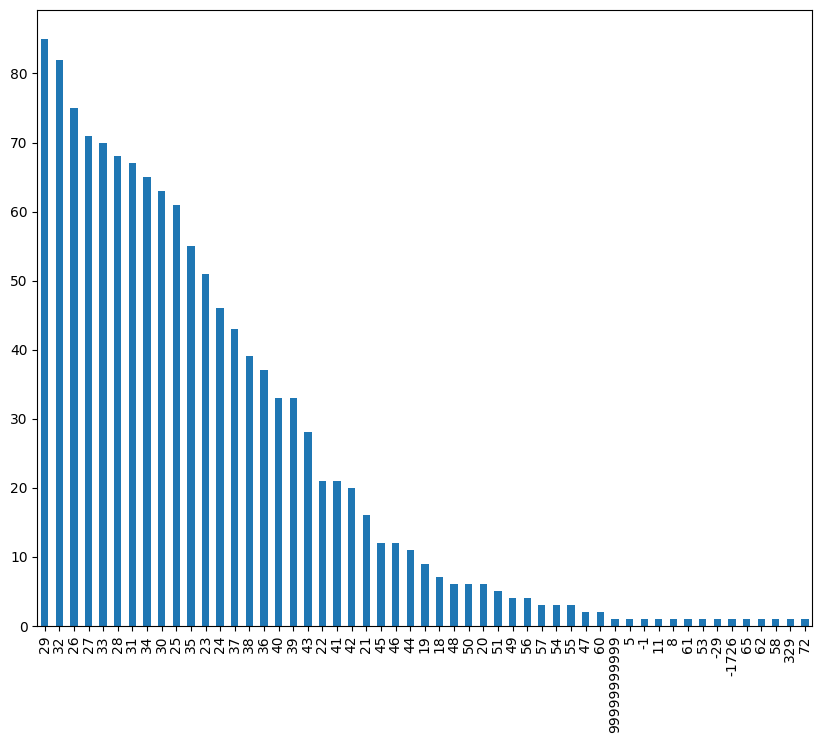

In [19]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [20]:
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace=True)

<Axes: >

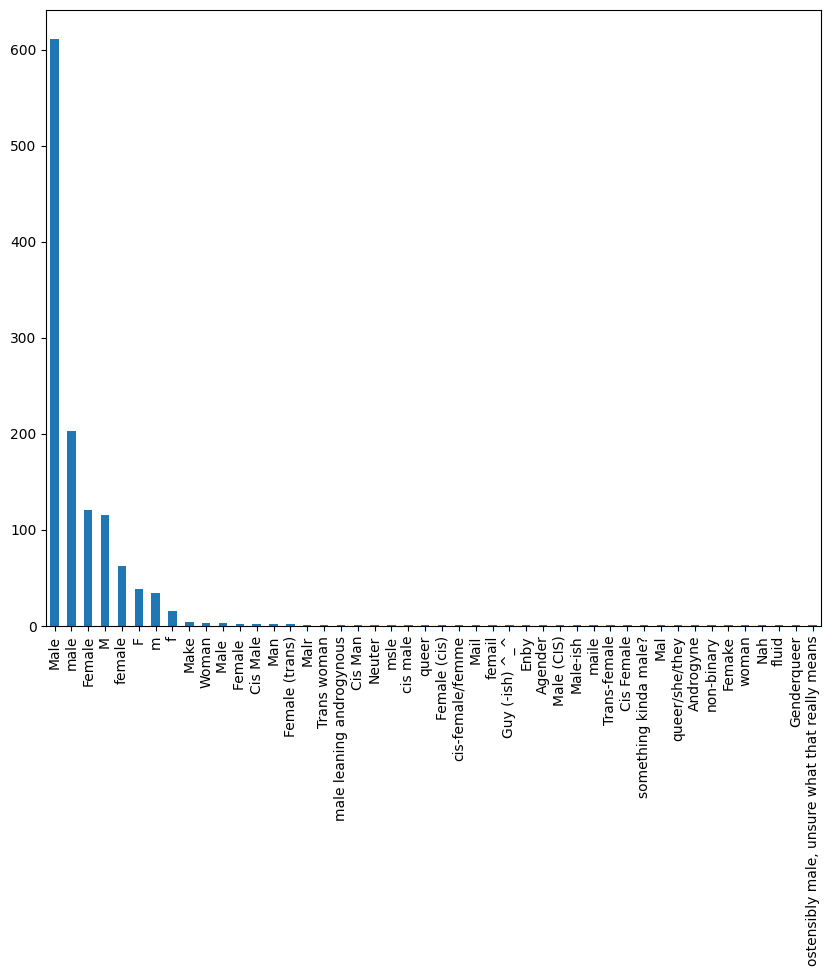

In [21]:
data['Gender'].value_counts().plot(kind="bar", figsize=(10,8))

In [22]:
data['Gender'].replace([ 'Male', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make', ], 'Male', inplace=True)

data['Gender'].replace(['Female', 'female', 'F', 'f', 'Woman' 'Female', 'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)', 'woman', ], 'Female', inplace=True)

data["Gender"].replace([ 'Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah', 'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman', ], 'Non-Binary', inplace=True)

<ipython-input-23-372e32168379>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data["Age"])


Text(0.5, 0, 'Age')

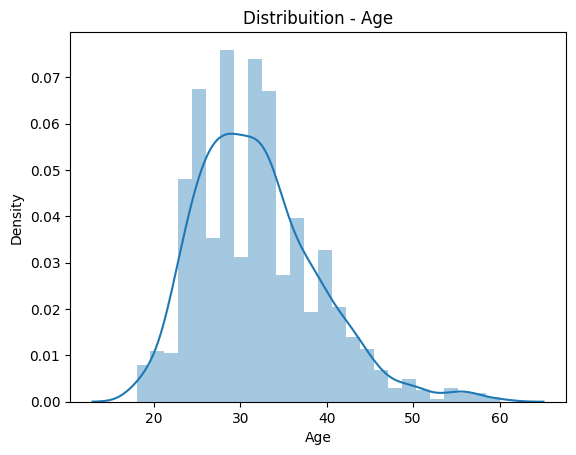

In [23]:
sb.distplot(data["Age"])
plt.title("Distribuition - Age")
plt.xlabel("Age")

Text(0.5, 1.0, 'Employment Type')

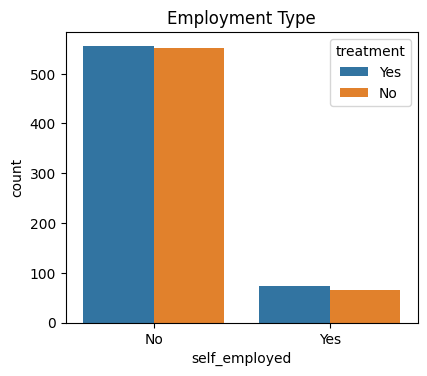

In [24]:
plt.figure(figsize=(10, 40))
plt.subplot(9, 2, 1)
sb.countplot(x=data['self_employed'], hue=data['treatment'])
plt.title('Employment Type')



Text(0.5, 1.0, 'work Interference')

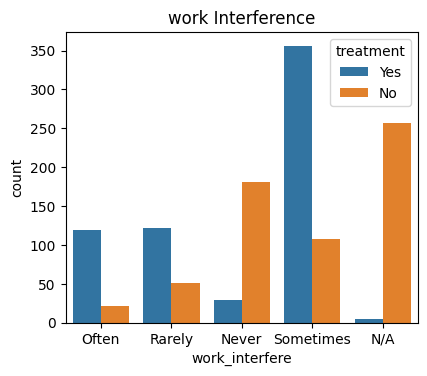

In [25]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(x=data['work_interfere'], hue = data['treatment'])
plt.title('work Interference')

Text(0.5, 1.0, 'Work Type')

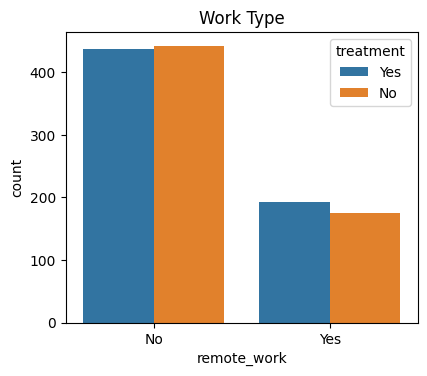

In [26]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(x=data['remote_work'], hue = data['treatment'])
plt.title('Work Type')

Text(0.5, 1.0, 'company')

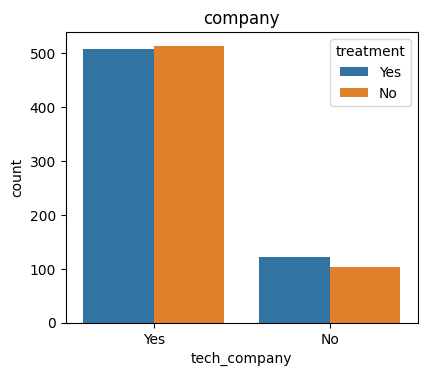

In [27]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(x=data['tech_company'], hue = data['treatment'])
plt.title('company')

Text(0.5, 1.0, 'Benefits')

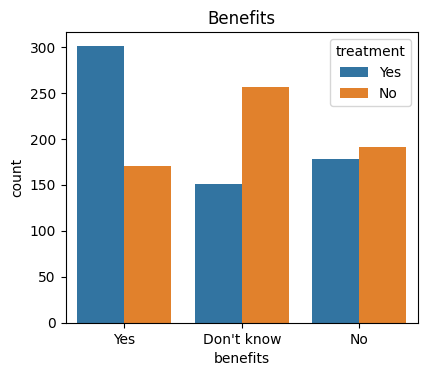

In [28]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(x=data['benefits'], hue = data['treatment'])
plt.title('Benefits')

Text(0.5, 1.0, 'Care Options')

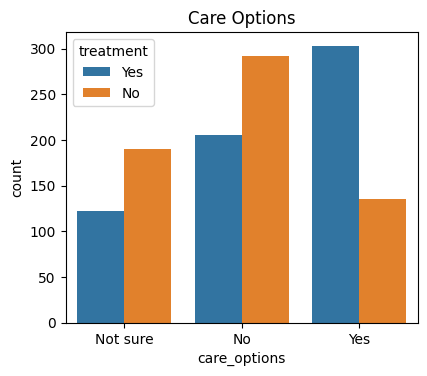

In [29]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(x=data['care_options'], hue = data['treatment'])
plt.title('Care Options')

Text(0.5, 1.0, 'Equal importance to Mental and physical health')

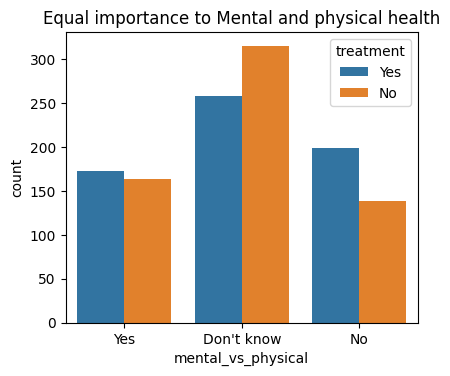

In [30]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(x=data['mental_vs_physical'], hue = data['treatment'])
plt.title('Equal importance to Mental and physical health')

Text(0.5, 1.0, 'Wellness program')

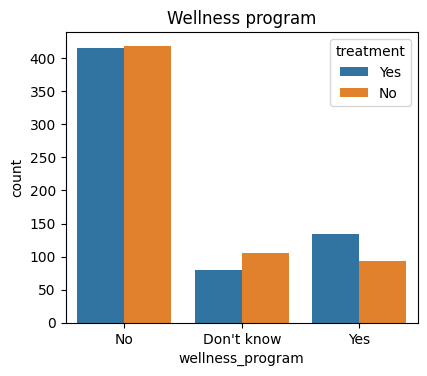

In [31]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(x=data['wellness_program'], hue = data['treatment'])
plt.title('Wellness program')

Text(0.5, 1.0, 'Anonymity')

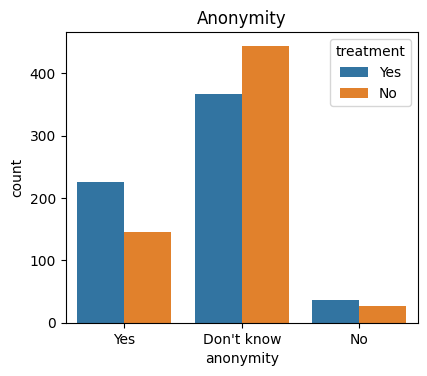

In [32]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(x=data['anonymity'], hue = data['treatment'])
plt.title('Anonymity')

Text(0.5, 1.0, 'Leave')

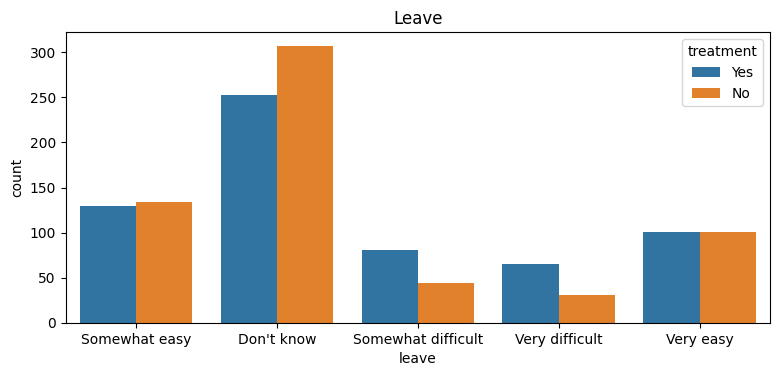

In [33]:
plt.figure(figsize=(20,40))
plt.subplot(9,2,11)
sb.countplot(x=data['leave'], hue = data['treatment'])
plt.title('Leave')

Text(0.5, 1.0, 'Mental health consequence')

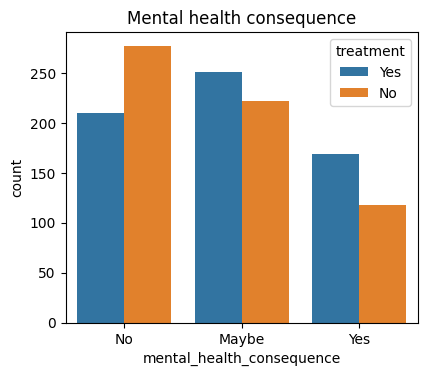

In [34]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(x=data['mental_health_consequence'], hue = data['treatment'])
plt.title('Mental health consequence')

Text(0.5, 1.0, 'physical health consequence')

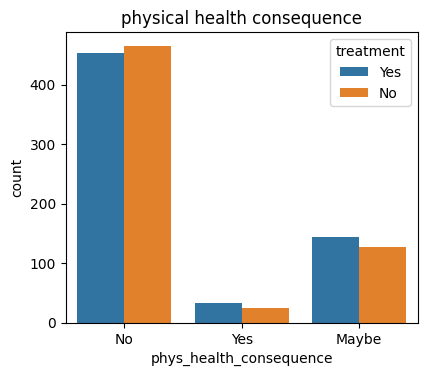

In [35]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(x=data['phys_health_consequence'], hue = data['treatment'])
plt.title('physical health consequence')

Text(0.5, 1.0, 'Discussion with coworkers')

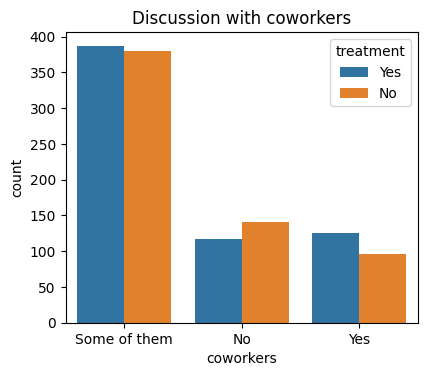

In [36]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(x=data['coworkers'], hue = data['treatment'])
plt.title('Discussion with coworkers')

Text(0.5, 1.0, 'Disscusion with supervisor')

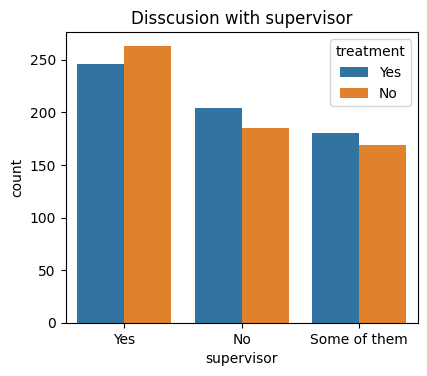

In [37]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(x=data['supervisor'], hue = data['treatment'])
plt.title('Disscusion with supervisor')

Text(0.5, 1.0, 'Discussion with interviewer(Mental)')

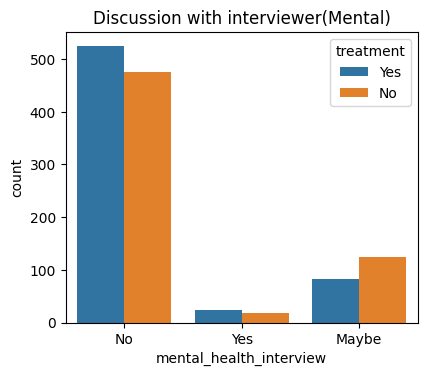

In [38]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(x=data['mental_health_interview'], hue = data['treatment'])
plt.title('Discussion with interviewer(Mental)')

Text(0.5, 1.0, 'Discussion with Interviewer(Physical)')

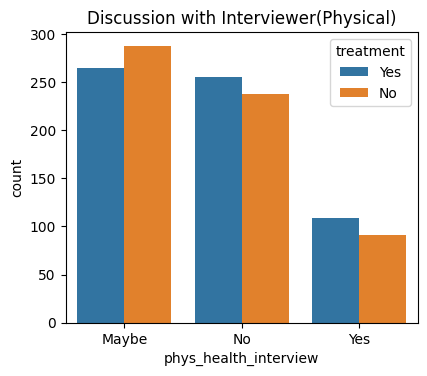

In [39]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(x=data['phys_health_interview'], hue = data['treatment'])
plt.title('Discussion with Interviewer(Physical)')

Text(0.5, 1.0, 'Consequence aftre disclosure')

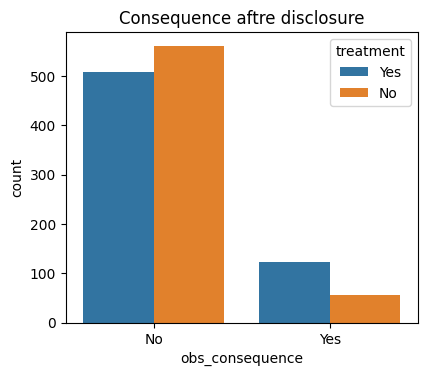

In [40]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(x=data['obs_consequence'], hue = data['treatment'])
plt.title('Consequence aftre disclosure')

In [41]:
data.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1247,1247.000000,1247,1247,735,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,161
unique,1235,NaN,6,46,45,2,2,2,5,6,...,5,3,3,3,3,3,3,3,2,157
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,980,743,137,1107,759,630,463,288,...,560,487,918,767,509,1000,553,573,1068,5
mean,NaN,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
X = data.drop('treatment', axis = 1)
y = data['treatment']

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [44]:
X = data.drop('treatment', axis=1)
y = data['treatment']

In [50]:
ct = ColumnTransformer ([('oe', OrdinalEncoder (), ['Gender', 'self employed', 'family history','work_interfere', 'no_employees', 'remote_work', 'tech company','benefits', 'care_options', 'wellness_program', 'seek help','anonymity', 'leave', 'mental_health_consequence','phys_health_consequence', 'coworkers', 'supervisor','mental health interview', 'phys_health_interview','mental_vs_physical', 'obs_consequence'])], remainder='passthrough')



In [61]:
print(data.columns)


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [62]:
X = ct.fit_transform(X)

ValueError: ignored

In [ ]:
import sklearn
print(sklearn.__version__)


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
import joblib
joblib.dump(ct, ' feature_values')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=49)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [ ]:
model_dict = {}
model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier (random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier (random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier (random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier (random_state=49)
model_dict['XGB Classifier'] = XGBClassifier (random_state=49)

In [ ]:
def model_test(x_train, x_test, y_train, y_test, model, model_name):

  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score (y_test,y_pred)
  print(' -----{}------ '.format(model_name))
  print('Score is: {}'.format(accuracy))

  print()

In [ ]:
for model_name, model in model_dict.items():
  model_test(X_train, X_test, y_train, y_test, model, model_name)

In [ ]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train, y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost=', accuracy_score (y_test, pred_abc))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params_abc = {'n_estimators': [int(x) for x in np.linspace(start = 1, stop = 50, num = 15)],
              'learning_rate': [(0.97 + x/100) for x in range(0, 8)],}

abc_random = RandomizedSearchCV(random_state=49, estimator=abc, param_distributions = params_abc,n_iter =50,cv=5,n_jobs=-1)

In [ ]:
params_abc

In [59]:
abc_random.fit(X_train,y_train)

NameError: ignored

In [ ]:
abc_random.best_params_

In [ ]:
abc_tuned = AdaBoostClassifier (random_state=49,n_estimators=11, learning_rate=1.02)
abc_tuned.fit(X_train,y_train)
pred_abc_tuned = abc_tuned.predict(X_test)
print('Accuracy of AdaBoost (tuned)=', accuracy_score (y_test, pred_abc_tuned))

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [52]:
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

NameError: ignored

In [54]:
fpr_abc, tpr_abc, thresholds_abc = roc_curve (y_test, pred_abc)
roc_auc_abc = metrics. auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color="blue", linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend (loc='lower right')
plt.show()
roc_curve (y_test, pred_abc)

NameError: ignored

In [55]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve(y_test, pred_abc_tuned)
roc_auc_abc_tuned = metrics.auc (fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, colors = 'orange', label='ROC curve (area %0.2f)' % roc_auc_abc_tuned)
plt.plot([0, 1], [0, 1], colors = 'blue', linestyle='--')
plt.xlin([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 -  Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend (loc='lower right')
plt.show()
roc_curve(y_test, pred_abc_tuned)

NameError: ignored

In [56]:
print(classification_report (y_test, pred_abc))

NameError: ignored

In [57]:
print(classification_report (y_test, pred_abc_tuned))

NameError: ignored

In [58]:
import pickle
pickle.dump(abc_tuned, open('model.pkl', 'wb'))

NameError: ignored